### 作品5. 單變量函數的根與最小值

#### 姓名 : 林詠翔  系級 : 會計三 學號 : 410977095 

#### 目標 :  

#### 1. 學習如何運用程式計算積分
#### 2. 學習如何找出根的位置並正確標示
#### 3. 練習找尋區域內極值並畫圖

#### 所需套件 : 

- scipy.stats 中的 optimize 跟 scalar相關模組

- numpy

- matplotlib.pyplot







### 題目 1 : $ \min_x \sqrt{\frac{x^2+1}{x+1}} $

注意事項與討論 :

- 需使用 plt.text標記最小值位置和座標  ( 第1 和 第2 參數必為 x,y 座標)

- 用opt.minimize_scalar函式找出根最小值


     fun: 0.9269406601350643
 message: 'Solution found.'
    nfev: 10
     nit: 10
  status: 0
 success: True
       x: 0.29715686041942463


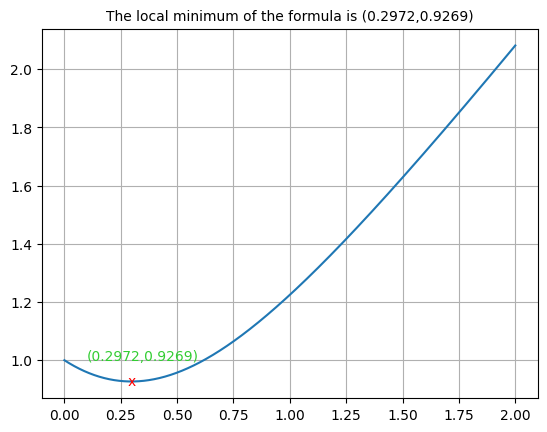

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

x = np.linspace(0, 2, 1000)

def formula(x):
    return np.sqrt((x**2)+1/(x+1))

plt.plot(x, formula(x))
sol = opt.minimize_scalar(formula, bounds=[0, 2], method="bounded")
plt.text(sol.x, sol.fun, "x", color="red", horizontalalignment='center',
         verticalalignment='center')
plt.text(0.1, 1, "({:.4f},{:.4f})".format(
    sol.x, sol.fun), color="limegreen", fontsize=10)
plt.grid(True)
plt.title("The local minimum of the formula is ({:.4f},{:.4f})".format(
    sol.x, sol.fun), fontsize=10)



### 題目 2 : $\min\limits_{-4 \leq x \leq 3} (x+1)^5 sin(x-3)$

注意事項與討論 :

- 需使用 plt.text標記最小值位置和座標  ( 第1 和 第2 參數必為 x,y 座標)

- 先畫出圖再鎖定最小值範圍必在 x = [1,3] 之間，再設定 bounds = [1,3]

- 使用opt.fsolve找出根，優點是能回傳的根數量比root_scalar多


[-3.28318531 -0.14159265]
[-0.14159265  3.        ]


Text(2.0, 20, '(3.0000,0)')

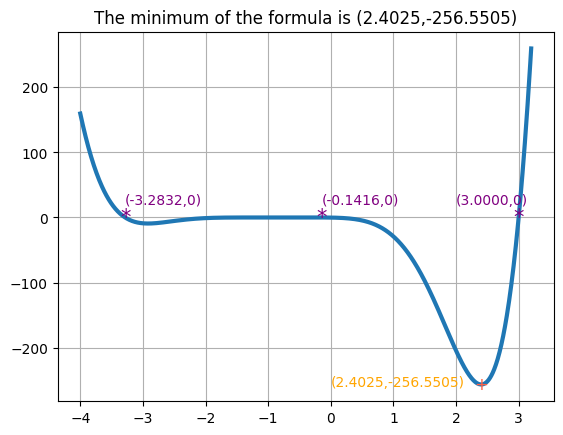

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

x2 = np.linspace(-4, 3.2, 1000)

def formula_sin(x2):
    return ((x2+1)**5)*np.sin(x2-3)

plt.plot(x2, formula_sin(x2),linewidth=3)
sol = opt.minimize_scalar(formula_sin, bounds=[1, 3], method="bounded")
plt.text(sol.x, sol.fun, "+", color="tomato", horizontalalignment='center',
         verticalalignment='center', size=12)
plt.text(0, -260, "({:.4f},{:.4f})".format(
    sol.x, sol.fun), color="orange", fontsize=10)
plt.title("The minimum of the formula is ({:.4f},{:.4f})".format(sol.x, sol.fun))
plt.grid(True)

roots_negative=opt.fsolve(formula_sin,x0=[-4,0])
roots_positive=opt.fsolve(formula_sin,x0=[0,4])
print(roots_negative)
print(roots_positive)
plt.text(roots_negative[0],0,"*",horizontalalignment='center',verticalalignment='center',
         fontsize=15,color="purple")
plt.text(roots_negative[1],0,"*",horizontalalignment='center',verticalalignment='center',
         fontsize=15,color="purple")
plt.text(roots_positive[1],0,"*",horizontalalignment='center',verticalalignment='center',
         fontsize=15,color="purple")
plt.text(roots_negative[0],20,"({:.4f},0)".format(roots_negative[0]),color="purple")
plt.text(roots_negative[1],20,"({:.4f},0)".format(roots_negative[1]),color="purple")
plt.text(roots_positive[1]-1,20,"({:.4f},0)".format(roots_positive[1]),color="purple")







### 題目 3 : 計算 L(x) = 10 的解 x, 其中 
$L(x) = \int_{a}^{x} \sqrt{1 + (f'(t))^2} dt$   , for $f(t) = \frac{t^2}{2}$ and $a=0$

注意事項與討論 :

-  先將公式轉換成 l(x) = L(x) - 10

-  求出 f'(t) = t

-  運用np.vectorize()模組可直接運用broadcast算出連續積分值，避開迴圈步驟

-  最後求出根的x值為4點多，因此最後將x範圍縮小到[0,5]之間


The root is 4.1680


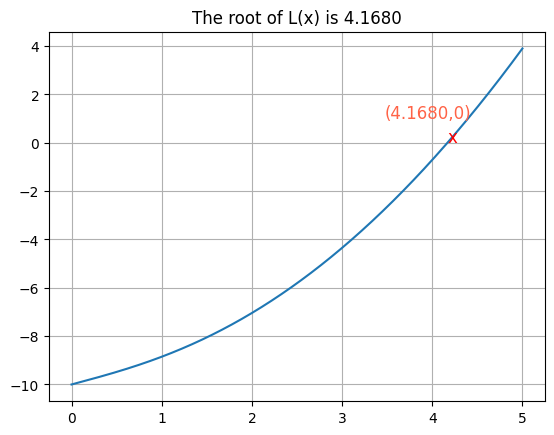

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integral

def formula_integral(x, prob):
    def g(x): return np.sqrt(1+np.square(x))
    return integral.quad(g, a, x)[0]-prob

a = 0
prob = 10
x3 = np.linspace(0, 5, 1000)
vec_formula = np.vectorize(formula_integral)
F = vec_formula(x3, prob)

plt.plot(x3, F)
sol = opt.root_scalar(formula_integral, args=prob,
                      bracket=[0, 5], method="toms748")
print("The root is {:.4f}".format(sol.root))
plt.text(sol.root, 0, "x", color="red", fontsize=12)
plt.text(sol.root-0.7, 1,
         "({:.4f},0)".format(sol.root, 0), fontsize=12, color="tomato")
plt.title("The root of L(x) is {:.4f}".format(sol.root))
plt.grid(True)


####  題目 4 : 最大概似函數估計（MLE）： 計算 $\max_{\lambda} \ln \Pi_{i=1}^N f(x_i; \lambda)$

題目說明 :

其中 f(x_i; $\lambda$) 代表指數分配（參數 $\lambda$）的概似函數，即 $f(x_i; \lambda) = \lambda e^{-\lambda x_i}$。 令樣本數 N= 10, 20 ,30, 50, 100, 300, 500， 分別生成樣本 x_i（令真實 $\lambda = 2$，或自己設定），並採最大概似估計法(log MLE)估計 $\lambda$。

任取一組樣本，繪製目標函數 $\displaystyle \ln \Pi_{i=1}^N f(x_i; \lambda)$，並標示出最大值的位置。

注意事項與討論 :

- $f(x_i; \lambda)$ 跟 gamma分配有關 ， 根據gamma分配設定，$\mu=\theta=\frac{1}{\lambda}$

- 再根據scipy.stats中有關expon.rvs()的說明，scale = 標準差 = $\frac{1}{\lambda}$

- size = N = 自行設定樣本數

- 用迴圈跑速度不夠快，應該有更好的方式可以用broadcast

- 需用到expon.rvs 產生指數形式亂數

- 標準誤差隨著樣本數變大而逐漸下滑




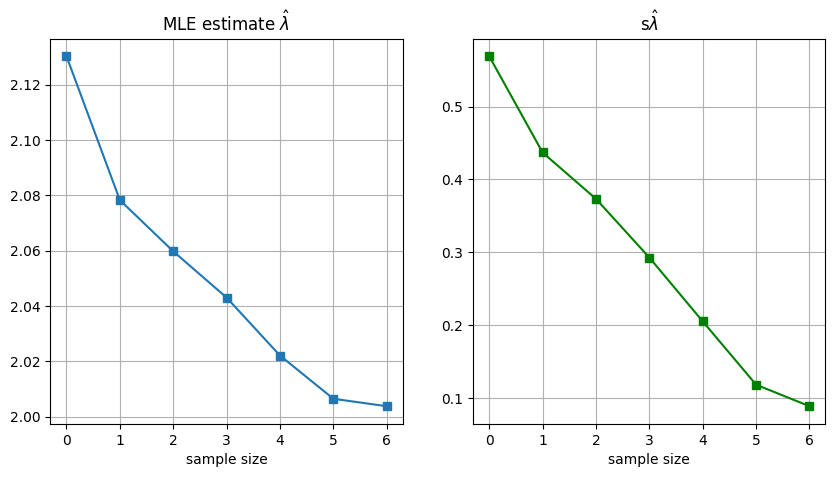

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import expon

n = [10, 20, 30, 50, 100, 300, 500]
N = 10000
pi = 2
loc = 0

data = np.zeros(N)
est_data = np.zeros(len(n))
std_data = np.zeros(len(n))

for i in range(len(n)):
    for j in range(N):
        x = expon.rvs(loc=0, scale=1/pi, size=n[i])
        def g(k): return -sum(np.log(k)-k*x)
        res = opt.minimize_scalar(g, bounds=[0, 3], method="bounded")
        data[j] = res.x

    est_data[i] = data.mean()
    std_data[i] = data.std()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(np.arange(len(n)), est_data, marker="s")
axes[0].set_xlabel("sample size")
axes[0].set_title("MLE estimate $\hat \lambda$")
axes[1].plot(np.arange(len(n)), std_data, marker="s", color="green")
axes[1].set_xlabel("sample size")
axes[1].set_title("s$\hat \lambda$")
axes[0].grid(True)
axes[1].grid(True)
